<h4>Lily Grumbach
    <br>M1 Humanités numériques - Université PSL</h4>
<h1><center>Rendu TAIS-TAL </center></h1>
<h2><center>Partie TAIS</center></h2>
<h3><center>3/5 : Reconstituer les URL de la base de donnée IREL</center></h3>

<h3><u>PLAN:</u></h3>

1) Harmonisation des données Géopolitiques pour le fond de carte de 1914
<br>
    
2) Explorer les bases de données à ma disposition (IREL et GPH) et les préparer pour l'extraction des coordonnées géographiques 
<br/>
 
<h4>3) Reconstituer les liens URL de la base de données IREL des Archives nationales d'Outre-mer.</h4>

4) Reconstituer les coordonnées géographiques des GPH et de l'IREL
 
5) Géoréférencer les données de mes revues

<h4>Stratégie en place :  </h4>

- Encoder au format url les noms de chaque lieu présent dans la bas de données de l'IREL.
- Reconstituer l'URL par concaténation de chaine 
- Séparation des entités pour une meilleure lisibilité et une possiblité de faire des recherches transversales

<h4>Objectifs de la partie : </h4>
Reconstituer les URL de l'IREL à partir de la liste des lieux pouvant être recherchés sur la base de données en ligne. 

# Import des modules

In [1]:
#module
import desambiguisation

##General : 
from desambiguisation import ListEntities2df
##GPH
from desambiguisation import MatchGPELOC_IREL,Extract_longlat_WikiData
##IREL : 
from desambiguisation import nettoyage_df_IREL,urlencode,Extract_longlat_IREL,IREL_Nettoyage_AdminLieuDit,nettoyage_desambiguisation,EgaliserTaille_MatchNot_IREL

#Généraux
import pandas as pd
import numpy as np
import re

#Webscrapping
from bs4 import BeautifulSoup
import geocoder
from lxml import html
import requests

#Wikidata 
import qwikidata

# 0. Les df de référence

In [2]:
df_IREL = pd.read_csv("./output/2-Exploration_GPH-IREL/IREL_nettoye.csv")
df_GPELOC= pd.read_csv("./output/2-Exploration_GPH-IREL/GPELOC_à_annoter.csv")

list_GPELOC = df_GPELOC["NAME"].to_list()
# list_GPELOC

### 2.3.1.reconstituer les URL de IREL:

In [3]:
#encoder les titres
list_titre_encoded =[]
for titre in df_IREL["titre"]:
    titre_encoded=urlencode(titre)
    list_titre_encoded.append(titre_encoded)

df_IREL["titre_encoded"] = list_titre_encoded

#reconstituer l'URL
list_url=[]
for encoded in df_IREL["titre_encoded"]:
    IREL_url= "http://anom.archivesnationales.culture.gouv.fr/geo.php?ir=&lieu="+encoded
    list_url.append(IREL_url)
    
df_IREL["IREL_url"] = list_url

#Chercher les coordonnées de chaque entrée:
#Beautiful Soup
pattern_coord_lat = r"\"value\"\:\{\"latitude\"\:(-?[\d]{1,2}\.[\d]*)\,"
pattern_coord_long = r"longitude\"\:(-?[\d]{1,3}\.[\d]*)\,"

df_IREL

,Unnamed: 0,Administration,NAME,Type,titre,titre_encoded,IREL_url
0,0,NaN,NaN,NaN,var geographie = [Aachen (Allemagne),var%20geographie%20%3D%20%5BAachen%20%28Allema...,http://anom.archivesnationales.culture.gouv.fr...
1,1,République du Congo,Abala,Subdivision,AbalaSubdivision (République du Congo),AbalaSubdivision%20%28R%C3%A9publique%20du%20C...,http://anom.archivesnationales.culture.gouv.fr...
2,2,Bénin,Abananquem,NaN,Abananquem (Bénin),Abananquem%20%28B%C3%A9nin%29,http://anom.archivesnationales.culture.gouv.fr...
3,3,Algérie,Abbaziz,NaN,Abbaziz (Algérie),Abbaziz%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...
4,4,Somme ; France,Abbeville,NaN,Abbeville (Somme ; France),Abbeville%20%28Somme%20%3B%20France%29,http://anom.archivesnationales.culture.gouv.fr...
...,...,...,...,...,...,...,...
14566,14566,Allemagne,Zusenhofen,NaN,Zusenhofen (Allemagne),Zusenhofen%20%28Allemagne%29,http://anom.archivesnationales.culture.gouv.fr...
14567,14567,Nord ; France,Zuytpeene,NaN,Zuytpeene (Nord ; France),Zuytpeene%20%28Nord%20%3B%20France%29,http://anom.archivesnationales.culture.gouv.fr...
14568,14568,Algérie,Z\'Mala,NaN,Z\Mala (Algérie),Z%5CMala%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...
14569,14569,Algérie,Z’Malet El Emir Abdelkader,NaN,Z’Malet El Emir Abdelkader (Algérie),Z%E2%80%99Malet%20El%20Emir%20Abdelkader%20%28...,http://anom.archivesnationales.culture.gouv.fr...


#### Par économie de mémoire et de temps, à l'issue de la récupération des URL nous les avons exporté dans un csv trouvable ici : 
`"./output_finaux/ListeCoordonnees.csv"`

In [4]:
### LISTE des coordonnées récupérée et exportée dans "./output_finaux/ListeCoordonnees.csv"

# liste_coords=[]
# for url in df_IREL["IREL_url"]: 
#     coords = desambiguisation.Extract_longlat_IREL(url)
#     liste_coords.append(coords)
# df_IREL["Coordonnees"]=liste_coords
# df_IREL["Coordonnees"].to_csv("./output_finaux/ListeCoordonnees.csv",sep='\t',index=False)


In [5]:
df_IREL["Coordonnees"]=pd.read_csv("./output_finaux/ListeCoordonnees.csv",sep='\t')

#En faisant mon code précédent, j'ai fait une erreur en prenant dans la même colonne
#longitude et latitude. 
df_IREL=pd.concat([df_IREL,df_IREL["Coordonnees"].str.split(" ",expand=True)],axis=1)
df_IREL.rename(columns={0:"latitude",1:"longitude"})

,Unnamed: 0,Administration,NAME,Type,titre,titre_encoded,IREL_url,Coordonnees,latitude,longitude
0,0,NaN,NaN,NaN,var geographie = [Aachen (Allemagne),var%20geographie%20%3D%20%5BAachen%20%28Allema...,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN
1,1,République du Congo,Abala,Subdivision,AbalaSubdivision (République du Congo),AbalaSubdivision%20%28R%C3%A9publique%20du%20C...,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN
2,2,Bénin,Abananquem,NaN,Abananquem (Bénin),Abananquem%20%28B%C3%A9nin%29,http://anom.archivesnationales.culture.gouv.fr...,6.2850 1.8118,6.2850,1.8118
3,3,Algérie,Abbaziz,NaN,Abbaziz (Algérie),Abbaziz%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,34.6167 2.8000,34.6167,2.8000
4,4,Somme ; France,Abbeville,NaN,Abbeville (Somme ; France),Abbeville%20%28Somme%20%3B%20France%29,http://anom.archivesnationales.culture.gouv.fr...,50.1 1.8333,50.1,1.8333
...,...,...,...,...,...,...,...,...,...,...
14566,14566,Allemagne,Zusenhofen,NaN,Zusenhofen (Allemagne),Zusenhofen%20%28Allemagne%29,http://anom.archivesnationales.culture.gouv.fr...,48.5500 8.0167,48.5500,8.0167
14567,14567,Nord ; France,Zuytpeene,NaN,Zuytpeene (Nord ; France),Zuytpeene%20%28Nord%20%3B%20France%29,http://anom.archivesnationales.culture.gouv.fr...,50.7947 2.4275,50.7947,2.4275
14568,14568,Algérie,Z\'Mala,NaN,Z\Mala (Algérie),Z%5CMala%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN
14569,14569,Algérie,Z’Malet El Emir Abdelkader,NaN,Z’Malet El Emir Abdelkader (Algérie),Z%E2%80%99Malet%20El%20Emir%20Abdelkader%20%28...,http://anom.archivesnationales.culture.gouv.fr...,34.9000 2.3500,34.9000,2.3500


<h4>Un point sur les coordonnnées géographiques manquantes</h4>

On a <b><u>5805</u></b> noms de lieux de la base IREL sans coordonnées géographiques. 

===>> Question à régler plus tard pour avoir à l'avenir une bdd pertinente et réutilisable par toutes et tous : L'absence de long/lat tient notamment à des problèmes de ponctuation, d'espace et d'appostrophe qui se sont donc mal transcris avec `url_encode`

In [6]:
print("nombre de coordonnées manquantes : ",df_IREL["Coordonnees"].isna().sum())

df_IREL.loc[df_IREL["Coordonnees"].isna()]["titre"].sample(n=10)

nombre de coordonnées manquantes :  5805


9329                 M\Bour/JoalRoute (Sénégal)
1492     Bayern (Allemagne ; Région historique)
9                     AbéchéSubdivision (Tchad)
7192                 LargeauSubdivision (Tchad)
909                AssomptionÎle de l\ (Canada)
5797                             GuinéeGolfe de
7873           LogoneCirconscription (Cameroun)
11092          Quintin (Côtes-d\Armor ; France)
6079       HesseRégion géographique (Allemagne)
2676                      CachipourCap (Brésil)
Name: titre, dtype: object

In [7]:
df_IREL.to_csv("./output_finaux/IREL_Coordonnees.csv")
df_IREL.to_csv("./output/3-Reconstitution_URL_IREL/IREL_Coordonnees.csv")

## Nettoyage des colonnes Aministration et Lieu-dit du df IREL 

Les deux colonnes en questions nous permettront de déterminer si oui ou non le lieu est géolocalisé dans la base de donnée IREL

In [8]:
df_IREL=IREL_Nettoyage_AdminLieuDit(df_IREL)


nouvelle colonne créée :  Administration_bis . au rang :  10

nouvelle colonne créée :  Lieu-dit_bis . au rang :  11


In [9]:
df_IREL=df_IREL.rename(columns={0:"latitude",1:"longitude"})
df_IREL.to_csv("./output/3-Reconstitution_URL_IREL/IREL_ens_url.csv",index=False)
df_IREL

,Unnamed: 0,Administration,NAME,Type,titre,titre_encoded,IREL_url,Coordonnees,latitude,longitude,Administration_bis,Lieu-dit_bis
0,0,NaN,NaN,NaN,var geographie = [Aachen (Allemagne),var%20geographie%20%3D%20%5BAachen%20%28Allema...,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN,,
1,1,République du Congo,Abala,Subdivision,AbalaSubdivision (République du Congo),AbalaSubdivision%20%28R%C3%A9publique%20du%20C...,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN,,
2,2,Bénin,Abananquem,NaN,Abananquem (Bénin),Abananquem%20%28B%C3%A9nin%29,http://anom.archivesnationales.culture.gouv.fr...,6.2850 1.8118,6.2850,1.8118,,
3,3,Algérie,Abbaziz,NaN,Abbaziz (Algérie),Abbaziz%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,34.6167 2.8000,34.6167,2.8000,,
4,4,Somme ; France,Abbeville,NaN,Abbeville (Somme ; France),Abbeville%20%28Somme%20%3B%20France%29,http://anom.archivesnationales.culture.gouv.fr...,50.1 1.8333,50.1,1.8333,,
...,...,...,...,...,...,...,...,...,...,...,...,...
14566,14566,Allemagne,Zusenhofen,NaN,Zusenhofen (Allemagne),Zusenhofen%20%28Allemagne%29,http://anom.archivesnationales.culture.gouv.fr...,48.5500 8.0167,48.5500,8.0167,,
14567,14567,Nord ; France,Zuytpeene,NaN,Zuytpeene (Nord ; France),Zuytpeene%20%28Nord%20%3B%20France%29,http://anom.archivesnationales.culture.gouv.fr...,50.7947 2.4275,50.7947,2.4275,,
14568,14568,Algérie,Z\'Mala,NaN,Z\Mala (Algérie),Z%5CMala%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN,,
14569,14569,Algérie,Z’Malet El Emir Abdelkader,NaN,Z’Malet El Emir Abdelkader (Algérie),Z%E2%80%99Malet%20El%20Emir%20Abdelkader%20%28...,http://anom.archivesnationales.culture.gouv.fr...,34.9000 2.3500,34.9000,2.3500,,


On récupère tous les noms de lieux en liste pour pouvoir comparer avec notre liste de GPELOC

In [10]:
#On récupère tous les noms de lieu: 
liste_colnames= ['Administration', 'NAME','Administration_bis',
       'Lieu-dit_bis','latitude','longitude']

liste_entites_clean=[]
for colname in liste_colnames:
    liste_entites_clean+=df_IREL[colname].to_list()
    
while None in liste_entites_clean:
        liste_entites_clean.remove(None)

liste_entites_clean

#Avoir une liste avec 1seule occurence de nom de lieu :
IREL_listeclean = pd.DataFrame(liste_entites_clean).rename(columns={0:"entites"})
IREL_listeclean = IREL_listeclean.groupby(by="entites").sum().index.values.tolist()

In [11]:
IREL_listeclean2=[]
for placeName in IREL_listeclean:
    
    if re.search(r" $",placeName):
        placeName=placeName.replace(re.search(r" $",placeName).group(0),"")    

    if re.search(r"^ ",placeName):
        placeName=placeName.replace(re.search(r"^ ",placeName).group(0),"")
    
    IREL_listeclean2.append(placeName)
# IREL_listeclean2

In [12]:
L_MatchDF_IREL, L_NotMatchDF_IREL =MatchGPELOC_IREL(list_GPELOC,IREL_listeclean2)

nombre d'occurences identifiablespar IREL :  111 
nombre d'occurences non identifiables par IREL :  114
2 outputs : 
 1/L_MatchDF_IREL
 2/L_NotMatchDF_IREL


#### EXPLORATION DES DEUX LISTES POUR COMPRENDRE CE QUI N'EST PAS PASSE 

In [13]:
# #pour que les deux listes aient la même longueur:
# lengthDiff=len(L_NotMatchDF_IREL)-len(L_MatchDF_IREL)
# L_MatchDF_IREL += list(np.empty(shape = (lengthDiff)))

L_MatchDF_IREL,L_NotMatchDF_IREL=EgaliserTaille_MatchNot_IREL(L_MatchDF_IREL,L_NotMatchDF_IREL)

comparaison_matchIREL = pd.DataFrame({'L_MatchDF_IREL' : L_MatchDF_IREL,
                                'L_NotMatchDF_IREL' : L_NotMatchDF_IREL},
                                columns=['L_MatchDF_IREL','L_NotMatchDF_IREL'])
#Pour exploration manuelle
comparaison_matchIREL.to_csv("./output/3-Reconstitution_URL_IREL/check_comparaisonMatchIREL.csv")

nouvelle taille L_Match_IREL2 114


In [14]:
#dictionnaire pour la désambiguisation :
Dico_desambiguisation = {"Guinée Française":["Guinée française"],
                         "Côte d'Ivoire":["côte d'Ivoire"],
                         "Pak-Hoi":["Pak-Hoï","Pakhoï"],
                         "Chengdu":['Tchen-Tou','Tchentou'],
                         "Yunnan":['Yun-Nam','Yun-Nan','Yunnam'],
                         "Hanoi":["Hanoï"],
                         "Laokay":["Lao-kay"],
                         "Côte d\'Ivoire":["Côte d'Ivoire","côte d'Ivoire"]
                        }
Liste_FP = ["Annamite","Annamites","île","Croyance","Port"]

#Problemes:
#Guinée trop flou pour être assigné à "Guinée française" car à la même époque existait
# une Guinée allemande et une britannique...

In [15]:
#Nettoyage en fonction de la désambiguisation 
liste_GPELOC = nettoyage_desambiguisation(Dico_desambiguisation,list_GPELOC)


In [18]:
L_MatchDF_IREL2, L_NotMatchDF_IREL2 = MatchGPELOC_IREL(list_GPELOC,IREL_listeclean2)

nombre d'occurences identifiablespar IREL :  111 
nombre d'occurences non identifiables par IREL :  114
2 outputs : 
 1/L_MatchDF_IREL
 2/L_NotMatchDF_IREL


In [21]:
#pour que les deux listes aient la même longueur:
lengthDiff=abs(len(L_NotMatchDF_IREL2)-len(L_MatchDF_IREL2))

if len(L_NotMatchDF_IREL2) > len(L_MatchDF_IREL2):
    L_MatchDF_IREL2 += list(np.empty(shape = (lengthDiff)))
    print("nouvelle taille L_Match_IREL2",len(L_Match_IREL2))
    
elif len(L_NotMatchDF_IREL2) < len(L_MatchDF_IREL2):
    L_NotMatchDF_IREL2 += list(np.empty(shape = (lengthDiff)))
    print("nouvelle taille L_NotMatch_IREL2",len(L_NotMatchDF_IREL2))

else:
    pass


In [22]:
print("Différence de taillent entre les deux listes : ",lengthDiff)
print("taille de L_NotMatchDF_IREL2 : ",len(L_NotMatchDF_IREL2))
print("taille de L_MatchDF_IREL2 : ",len(L_MatchDF_IREL2))

comparaison_matchIREL = pd.DataFrame({'L_MatchDF_IREL' : L_MatchDF_IREL2,
                                'L_NotMatchDF_IREL' : L_NotMatchDF_IREL2},
                                columns=['L_MatchDF_IREL','L_NotMatchDF_IREL'])
#Pour exploration manuelle
comparaison_matchIREL.to_csv("./output/3-Reconstitution_URL_IREL/check_comparaisonMatchIREL.csv")
comparaison_matchIREL

Différence de taillent entre les deux listes :  0
taille de L_NotMatchDF_IREL2 :  114
taille de L_MatchDF_IREL2 :  114


,L_MatchDF_IREL,L_NotMatchDF_IREL
0,Algérie,Acores
1,Allemagne,Angleterre
2,Bizerte,Annam
3,Bordeaux,Asie
4,Brest,Buenos-Ayres
...,...,...
109,Yunnan,lac Tchad.
110,Zinder,île de Saint-Barthélémy
111,6.92632e-310,île de Saint-Martin
112,6.92632e-310,île de la Réunion


In [46]:
df_ensemble = pd.DataFrame()
for placeName in L_MatchDF_IREL2:
    if type(placeName) == str:
        df_placeName=df_IREL.loc[df_IREL["titre"].str.contains(placeName)]
        df_placeName["placeName"]=placeName
        df_ensemble=pd.concat([df_ensemble,df_placeName])
df_ensemble

<ipython-input-46-f25e34f172c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placeName["placeName"]=placeName


,Unnamed: 0,Administration,NAME,Type,titre,titre_encoded,IREL_url,Coordonnees,latitude,longitude,Administration_bis,Lieu-dit_bis,placeName
3,3,Algérie,Abbaziz,NaN,Abbaziz (Algérie),Abbaziz%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,34.6167 2.8000,34.6167,2.8000,,,Algérie
6,6,Algérie,Abbo,NaN,Abbo (Algérie),Abbo%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,36.8558 3.8567,36.8558,3.8567,,,Algérie
7,7,Algérie,Abdi,NaN,Abdi (Algérie),Abdi%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,36.2661 7.3967,36.2661,7.3967,,,Algérie
8,8,Algérie,Abd El Beg,NaN,Abd El Beg (Algérie),Abd%20El%20Beg%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,36.1714 5.2356,36.1714,5.2356,,,Algérie
22,22,Algérie,Abid,NaN,Abid (Algérie),Abid%20%28Alg%C3%A9rie%29,http://anom.archivesnationales.culture.gouv.fr...,36.5435 3.8679,36.5435,3.8679,,,Algérie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13261,13261,Chine,Tchong King/Yunnansen,Voie ferrée,Tchong King/YunnansenVoie ferrée (Chine),Tchong%20King/YunnansenVoie%20ferr%C3%A9e%20%2...,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN,,,Yunnan
14457,14457,Chine,Yunnan Fou,NaN,Yunnan Fou (Chine),Yunnan%20Fou%20%28Chine%29,http://anom.archivesnationales.culture.gouv.fr...,25.0389 102.7183,25.0389,102.7183,,,Yunnan
14458,14458,Chine,Yunnan Sen,NaN,Yunnan Sen (Chine),Yunnan%20Sen%20%28Chine%29,http://anom.archivesnationales.culture.gouv.fr...,25.0389 102.7183,25.0389,102.7183,,,Yunnan
14459,14459,Chine,Yunnan,Province,YunnanProvince (Chine),YunnanProvince%20%28Chine%29,http://anom.archivesnationales.culture.gouv.fr...,NaN,NaN,NaN,,,Yunnan


In [45]:
df_ensemble_byPlaceName = df_ensemble.groupby(by="placeName").sum()

df_ensemble_byPlaceName

# df_ensemble.groupby(by="placeName").

,Unnamed: 0
placeName,
Abyssinie,42
Afrique,112380
Algérie,19986120
Allemagne,1073008
Amérique,58523
...,...
Toulon,54786
Vinh,316562
Wallis,42487


In [ ]:
df_ensemble_byPlaceName

In [ ]:
# df_ensemble_byPlaceName=df_ensemble_byPlaceName.drop(columns=["titre_encoded","Administration_bis","Lieu-dit_bis"])
df_ensemble_byPlaceName.to_csv("./output/3-Reconstitution_URL_IREL/IREL_parlieuxreconnus.csv")

#Nécessité de nettoyer IREL_url des localisations multiples. Nous n'en avons pas besoin car il nous suffit d'avoir un point en sont sein 
df_ensemble_byPlaceName["IREL_url"]

In [41]:
# df_ensemble

In [35]:
#Exploration des lieux contenant leplus de géolocalisations:
df_byPlaceName_freq = df_ensemble.groupby(by="placeName").count()["IREL_url"]
df_byPlaceName_freq=df_byPlaceName_freq.sort_values(ascending=False)
df_byPlaceName_freq.head(10)

placeName
France              3943
Algérie             2907
Guinée               324
Sénégal              322
Congo                276
Guadeloupe           270
Martinique           257
Guyane               208
Guyane française     202
Inde                 181
Name: IREL_url, dtype: int64

placeName
Guinée              324
Sénégal             322
Congo               276
Guadeloupe          270
Martinique          257
Guyane              208
Guyane française    202
Inde                181
Gabon               169
Niger               145
Allemagne           138
Tchad               131
Cambodge            129
Chine               123
Nord                104
Togo                 81
Maroc                78
Laos                 72
Mauritanie           71
Antilles             67
Réunion              55
Name: IREL_url, dtype: int64


<AxesSubplot:xlabel='placeName'>

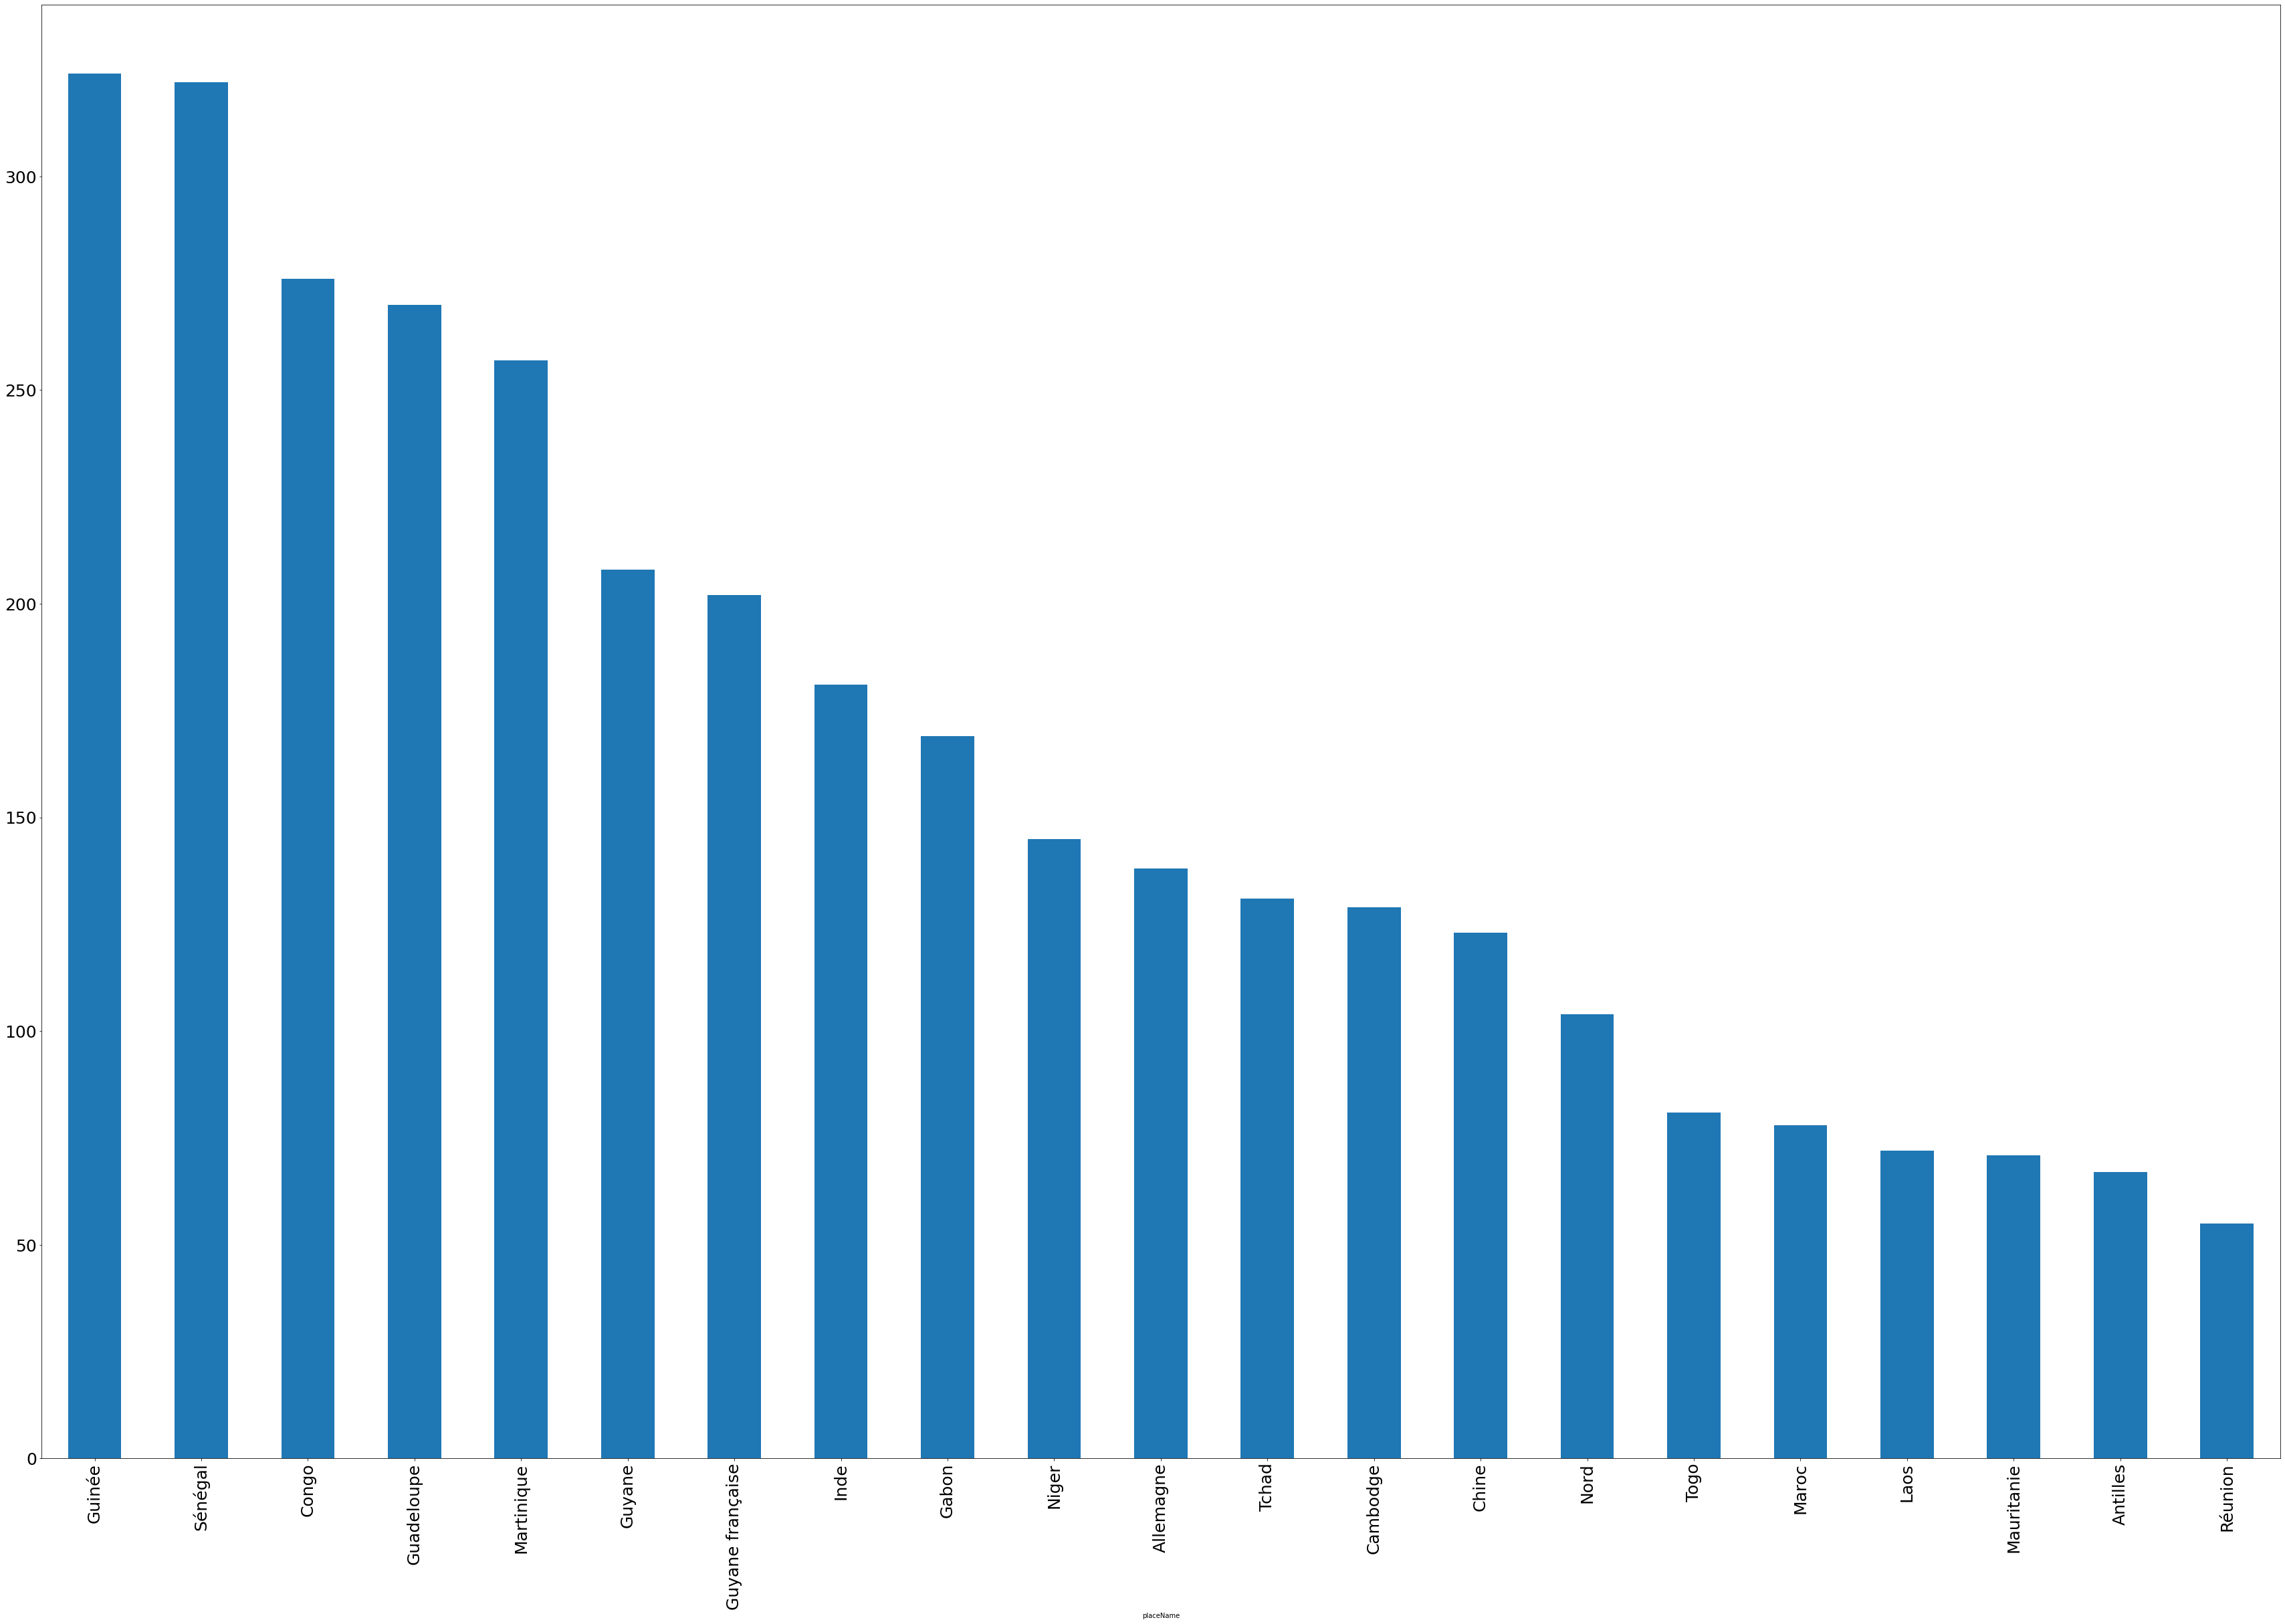

In [36]:
#Avoir une vision des localités ayant entre 50 et 500 références :
print(df_byPlaceName_freq.loc[(df_byPlaceName_freq<500) & (df_byPlaceName_freq>50)])
df_byPlaceName_freq.loc[(df_byPlaceName_freq<500) & (df_byPlaceName_freq>50)].plot.bar(figsize=(60,40), fontsize=25)

<h4>Si le terme de désignation est aussi "vague" que des noms d'entités géographiques à "grande échelle" comme "Guyane" ou "Inde", on se permet de prendre un site internet "au hasard" pour récupérer les coordonnées géographiques</h4>

In [40]:
# df_ensemble_byPlaceName

In [38]:
liste_urlIREL = list(df_ensemble_byPlaceName["IREL_url"].str.split("http",expand=True)[2])
for i in range (len(liste_urlIREL)):
    liste_urlIREL[i]="http"+str(liste_urlIREL[i])
# "http"+liste_urlIREL[3]
liste_urlIREL
df_ensemble_byPlaceName["IREL_url"]=liste_urlIREL
df_ensemble_byPlaceName.to_csv("./output/3-Reconstitution_URL_IREL/IREL_enslieuxreconnus.csv")

KeyError: 'IREL_url'

In [44]:
df_ensemble_byPlaceName

,Unnamed: 0
placeName,
Abyssinie,42
Afrique,112380
Algérie,19986120
Allemagne,1073008
Amérique,58523
...,...
Toulon,54786
Vinh,316562
Wallis,42487


In [ ]:
df_ensemble_byPlaceName2 = pd.merge(df_ensemble_byPlaceName,df_IREL,how='left',on="IREL_url")
df_ensemble_byPlaceName2 = df_ensemble_byPlaceName2[["IREL_url","NAME","latitude","longitude"]]


df_ensemble_byPlaceName2

In [ ]:
df_GPELOC=pd.merge(df_GPELOC,df_ensemble_byPlaceName2,how="outer",on="NAME")
df_GPELOC = df_GPELOC.rename(columns={"longitude_x":"longitude_GPH","longitude_y":"longitude_IREL","latitude_x":"latitude_GPH","latitude_y":"latitude_IREL"})
df_GPELOC

In [ ]:
df_GPELOC.to_csv("./output_finaux/GPELOC_coordonnées_GPH-IREL.csv")
df_GPELOC.to_csv("./output/3-Reconstitution_URL_IREL/GPELOC_coordonnées_GPH-IREL.csv")